## 1. Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

indices reverse mapping to words

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## 2. Preparing the data

 Encoding the integer sequences into a binary matrix

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

vectorizing labels

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. Building Network

Model Definition

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

 Compiling the model

In [6]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

## 4. Validation setup

Setting aside a validation set

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 5. Training the model

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 47ms/step - loss: 0.5086 - acc: 0.7907 - val_loss: 0.3941 - val_acc: 0.8588
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3066 - acc: 0.9033 - val_loss: 0.3285 - val_acc: 0.8682
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2286 - acc: 0.9277 - val_loss: 0.2788 - val_acc: 0.8925
Epoch 4/4
30/30 [==============================] - 1s 25ms/step - loss: 0.1804 - acc: 0.9432 - val_loss: 0.2726 - val_acc: 0.8907


## 6. Getting history data

Getting history dictionary data and Plotting the training and validation loss

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training and validation loss

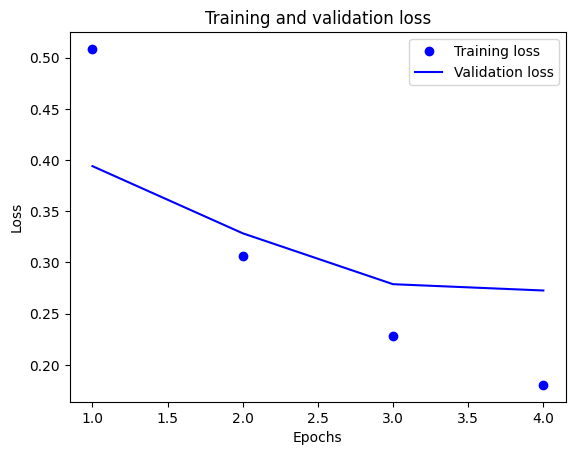

In [10]:
import matplotlib
import matplotlib.pyplot as plt

acc = history_dict['acc']

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

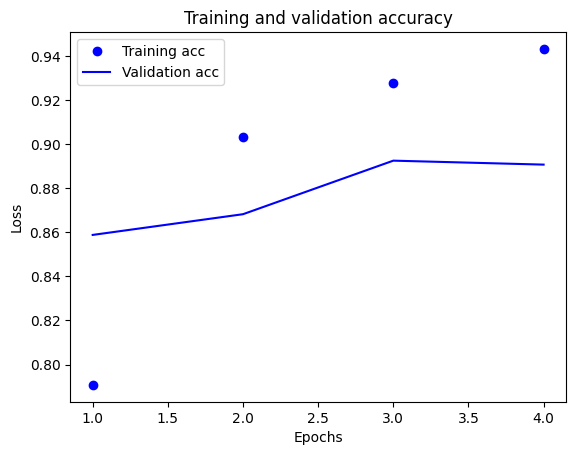

In [11]:
plt.clf()
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Using a trained network to generate predictions on new data

In [12]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.24252544],
       [0.99810034],
       [0.9134296 ],
       ...,
       [0.09680122],
       [0.16613574],
       [0.67335105]], dtype=float32)